# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(api_key)

0eb3d9ec6d11c152a3075a96bf027022


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"
# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 6.3542, 'lat': 59.6506},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 289.64,
  'feels_like': 289.8,
  'temp_min': 289.64,
  'temp_max': 289.64,
  'pressure': 1012,
  'humidity': 94,
  'sea_level': 1012,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 1.75, 'deg': 250, 'gust': 2.02},
 'clouds': {'all': 100},
 'dt': 1625949837,
 'sys': {'type': 2,
  'id': 2003794,
  'country': 'NO',
  'sunrise': 1625884365,
  'sunset': 1625950004},
 'timezone': 7200,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0eb3d9ec6d11c152a3075a96bf027022&units=imperial&q='

In [7]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
cityname = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cityname.append(city)
        print(city)
    except:
        print("City not Found")

mataura
ribeira grande
georgetown
vaini
cidreira
tuktoyaktuk
accra
neyshabur
novobelokatay
port alfred
bartica
City not Found
rikitea
qaanaaq
albany
sindor
kapaa
kampot
kodiak
marawi
senno
krasnyy kommunar
bredasdorp
purificacion
City not Found
City not Found
hilo
norman wells
ambon
nkhata bay
clyde river
puerto ayora
new norfolk
mendi
lodwar
yulara
ambositra
provideniya
coihaique
ushuaia
cape town
bluff
east london
beaufort
zherdevka
mar del plata
prince rupert
geraldton
zhumadian
mitu
beringovskiy
chokurdakh
City not Found
kruisfontein
lavrentiya
nhulunbuy
dikson
barrow
havelock
matara
broome
hervey bay
City not Found
westport
charlestown
kaitangata
rawson
shelburne
punta arenas
yegorlykskaya
union
edwardsville
busselton
bethel
smithers
teodoro sampaio
City not Found
hobart
filadelfia
atuona
aksu
City not Found
luis correia
arraial do cabo
jamestown
kribi
City not Found
tuatapere
saint-francois
narsaq
udachnyy
walvis bay
avarua
kaeo
zhizdra
thompson
yar-sale
abu samrah
mehamn
nikolsk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({"City Name":cityname,
                          "Country":country,
                          "Date": date,
                          "Latitude": lat,
                          "Longitude": lng,
                          "Temperature": temp,
                          "Cloudiness": cloudiness,
                          "Humidity": humidity,
                          "Wind Speed": wind_speed,})
weather_df

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
0,mataura,NZ,1625949840,-46.1927,168.8643,38.16,98,99,3.36
1,ribeira grande,PT,1625949840,38.5167,-28.7000,72.00,40,68,11.50
2,georgetown,MY,1625949780,5.4112,100.3354,77.76,20,93,1.01
3,vaini,TO,1625949840,-21.2000,-175.2000,69.96,75,94,5.75
4,cidreira,BR,1625949840,-30.1811,-50.2056,63.59,84,77,3.83
...,...,...,...,...,...,...,...,...,...
537,mercedes,AR,1625950019,-34.6515,-59.4307,56.21,0,48,6.02
538,egvekinot,RU,1625950019,66.3167,-179.1667,49.26,55,76,4.90
539,bac lieu,VN,1625950019,9.2850,105.7244,79.99,69,79,2.10
540,biak,ID,1625950019,-0.9131,122.8766,75.07,100,89,5.37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.loc[weather_df["Humidity"]> 100]

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

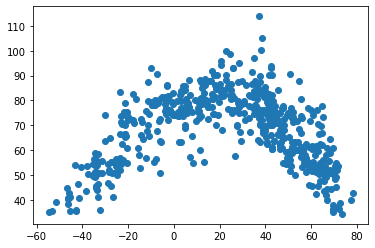

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"] )
plt.show()

## Latitude vs. Humidity Plot

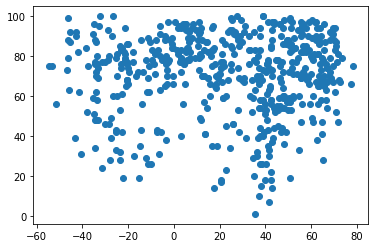

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"] )
plt.show()

## Latitude vs. Cloudiness Plot

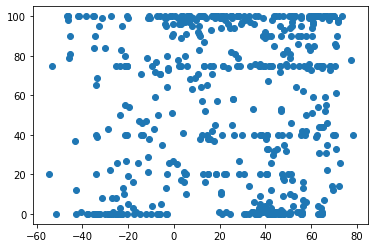

In [12]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"] )
plt.show()

## Latitude vs. Wind Speed Plot

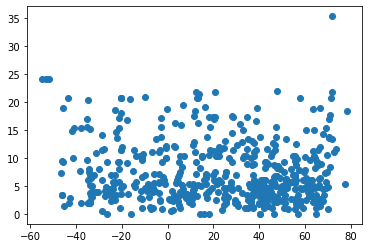

In [13]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"] )
plt.show()

## Linear Regression

In [14]:
n_df = weather_df.loc[weather_df["Latitude"] >= 0]
n_df.head()

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
1,ribeira grande,PT,1625949840,38.5167,-28.7000,72.00,40,68,11.50
2,georgetown,MY,1625949780,5.4112,100.3354,77.76,20,93,1.01
5,tuktoyaktuk,CA,1625949841,69.4541,-133.0374,60.80,40,67,5.75
6,accra,GH,1625949841,5.5560,-0.1969,79.21,75,78,10.36
7,neyshabur,IR,1625949842,36.2133,58.7958,76.80,1,32,4.74


In [15]:
s_df = weather_df.loc[weather_df["Latitude"] < 0]
s_df.head()

,City Name,Country,Date,Latitude,Longitude,Temperature,Cloudiness,Humidity,Wind Speed
0,mataura,NZ,1625949840,-46.1927,168.8643,38.16,98,99,3.36
3,vaini,TO,1625949840,-21.2000,-175.2000,69.96,75,94,5.75
4,cidreira,BR,1625949840,-30.1811,-50.2056,63.59,84,77,3.83
9,port alfred,ZA,1625949842,-33.5906,26.8910,55.51,0,58,6.38
11,rikitea,PF,1625949843,-23.1203,-134.9692,73.89,83,74,18.63


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

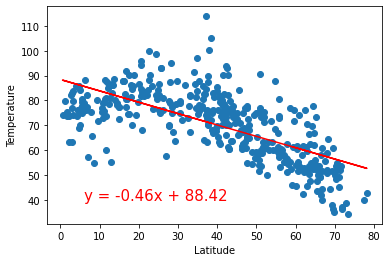

In [16]:
x_values = n_df['Latitude']
y_values = n_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

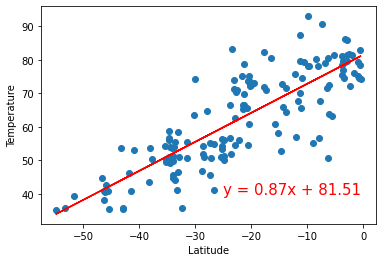

In [82]:
x_values = s_df['Latitude']
y_values = s_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

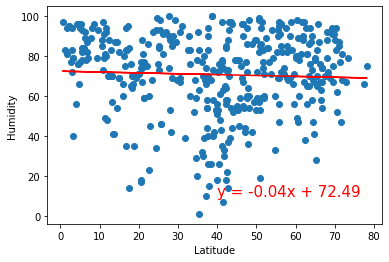

In [29]:
x_values = n_df['Latitude']
y_values = n_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

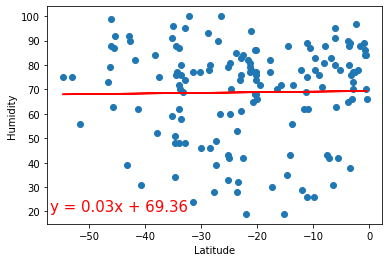

In [81]:
x_values = s_df['Latitude']
y_values = s_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

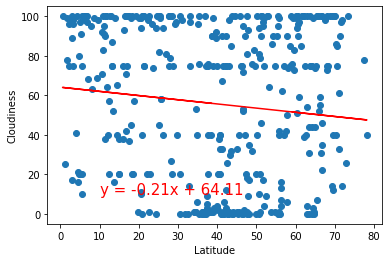

In [77]:
x_values = n_df['Latitude']
y_values = n_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

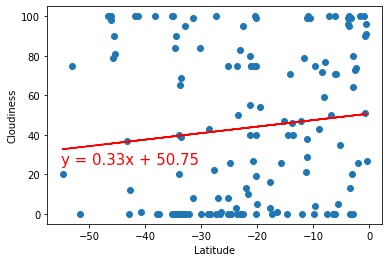

In [66]:
x_values = s_df['Latitude']
y_values = s_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

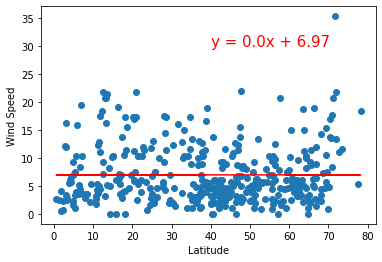

In [75]:
x_values = n_df['Latitude']
y_values = n_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

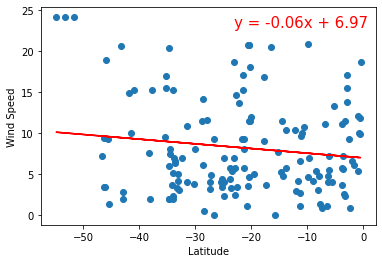

In [76]:
x_values = s_df['Latitude']
y_values = s_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()